In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pickle
from scipy.misc import imresize, imread, imsave
from inference import forward_pass
from scipy.misc import imresize
import matplotlib.pyplot as plt
import subprocess
import os


In [2]:
def coco_API_plot(origin_img, diff_objects):
    np.save("/home/fred/tmp/lua_bridge.npy", diff_objects)
    imsave("/home/fred/tmp/lua_bridge.jpg", (origin_img/2).astype(np.uint8))
    bashCommand = "cd /home/fred/Desktop/bot_mask_tool && th generated_msked_im.lua -img /home/fred/tmp//lua_bridge.jpg -masks /home/fred/tmp/lua_bridge.npy"
    subprocess.call(['/bin/bash', '-i', '-c', bashCommand])
    coco_style_plt_mask = imread("/home/fred/Desktop/bot_mask_tool/test.jpg")
    coco_style_plt_mask = imresize(coco_style_plt_mask, (240,240))
    return coco_style_plt_mask

In [4]:
def load_data(img_path, mask_path):
    
    
    img_items = sorted([img_path + '/'+ item for item in os.listdir(img_path)])
    mask_items = sorted([mask_path + '/'+ item for item in os.listdir(mask_path)])
    imgs = np.zeros((len(img_items), 350, 430, 3))
    masks = np.zeros((len(img_items), 350, 430))
    for i, img_name in enumerate(img_items):
        key = img_name.split('.jpg')[0].split('/')[-1]
        imgs[i] = imread(img_name)[20:370,230:660,:]
        #also prepare data for deepmask
        dp_mask_img = imread(img_name)[20:370,230:660,:]
        imsave("/home/fred/tmp/lua_dpm_bridge{}.jpg".format(i), dp_mask_img)
        mask_names = list(filter(lambda s: '/'+key+'_mask' in s, mask_items))
        for j, mask_name in enumerate(mask_names):
            mask = (imread(mask_name).sum(axis=2) > 0).astype(np.uint8)[20:370,230:660]
            masks[i] = np.logical_or(masks[i], mask)
        
    return imgs.astype(np.uint8), masks
imgs, masks = load_data(
#     '/home/fred/Desktop/bot_mask_tool/diff_bg/validation_unseen/Images/users/fred960315/unseen_bk_unseen_obj/',
#     '/home/fred/Desktop/bot_mask_tool/diff_bg/validation_unseen/Masks/users/fred960315/unseen_bk_unseen_obj/'
    '/media/4tb/dian/validation/Images/users/fred960315/validation',
    '/media/4tb/dian/validation/Masks/users/fred960315/validation'
)
# deep_mask_imgs, deep_mask_masks = deepmask_results(len(imgs))  

import pickle
# save_dict = {"msk":deep_mask_masks, "imgs": deep_mask_imgs}
# with open('/media/4tb/dian/validation/Masks/users/fred960315/deep_msk_npy.npy', 'wb') as handle:
#     pickle.dump(save_dict,handle, pickle.HIGHEST_PROTOCOL)
with open('/media/4tb/dian/validation/Masks/users/fred960315/deep_msk_npy.npy', 'rb') as handle:
    data = pickle.load(handle)
    deep_mask_imgs, deep_mask_masks = data['imgs'], data['msk']
from inference import forward_pass
reference = forward_pass("./models/train_sgd_resnet18_lambda_32.00_a_23_b_46_decay_0.00050_lr_factor0.10-56000", 'resnet18',debug = False)

finish building graph, all operator have been convolized


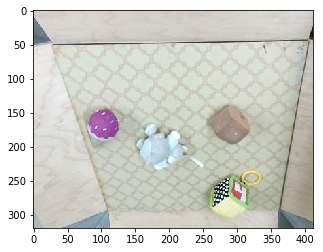

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


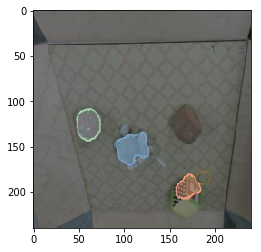

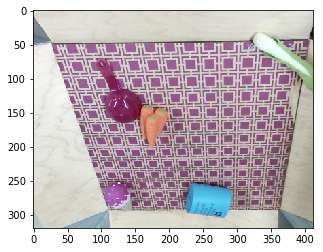

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


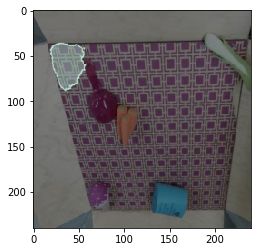

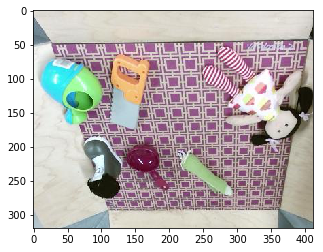

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


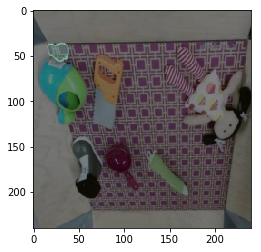

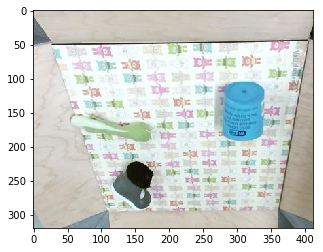

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


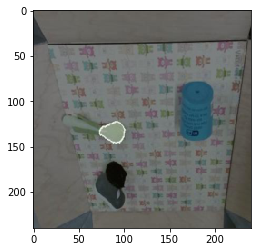

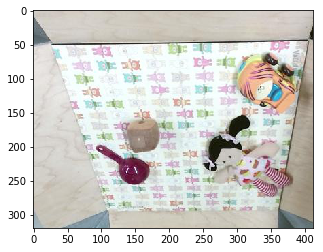

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


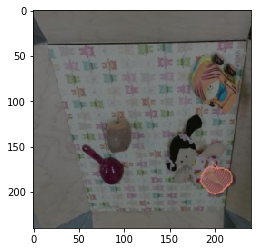

NameError: name 'fred' is not defined

In [5]:
count = 0
for i, img, mask, dp_msk_im, dp_msk_msk in zip(range(len(imgs)), imgs, masks,deep_mask_imgs, deep_mask_masks):
    img = img[:320, :412,:]
    plt.imshow(img)
    plt.show()
    result = reference.compute_multi_scale_slicing_window(img)
    score_cut_NMS = reference.msk_cut_score_NMS(score_tr = 0.95)
    coco_result = coco_API_plot(img, score_cut_NMS)
    plt.imshow(coco_result)
    plt.show()
#     for r in result[-50:]:
#         f, (ax1, ax2) = plt.subplots(1,2)
#         ax1.imshow(r.mask)
#         ax2.imshow(r.canonical_window)
#         ax2.set_title(r.score)
#         plt.show()
    count += 1
    if count == 5:
        fred()

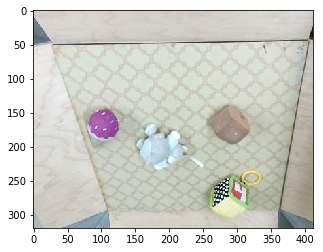

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


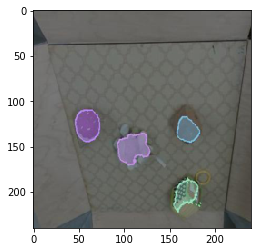

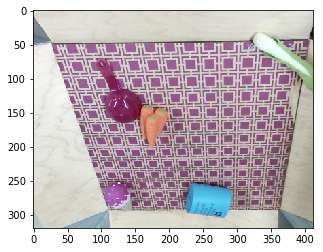

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


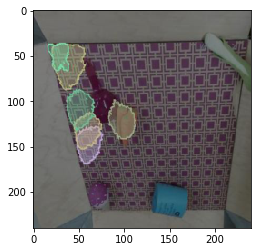

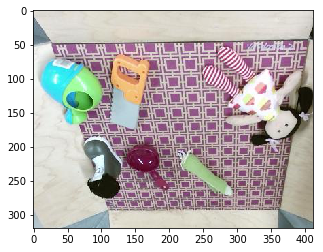

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


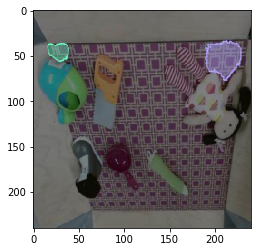

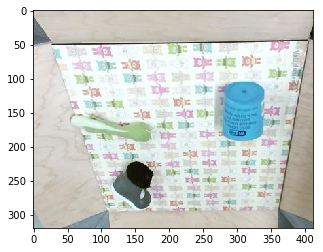

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


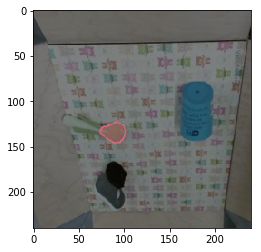

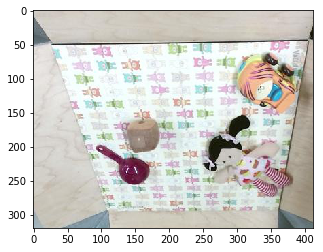

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


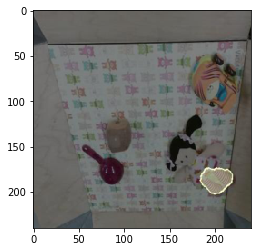

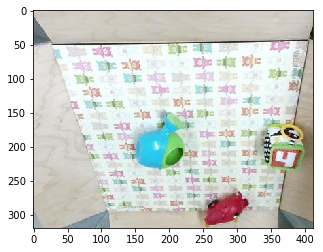

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


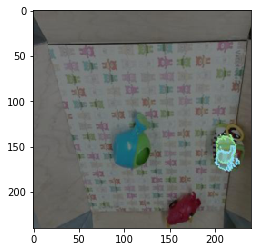

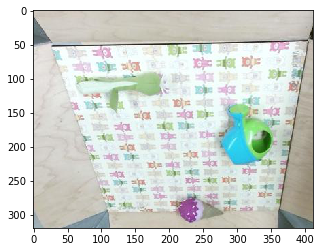

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


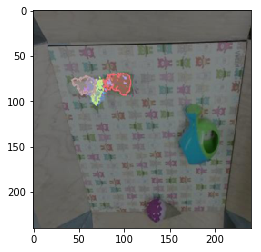

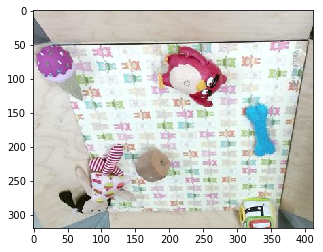

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


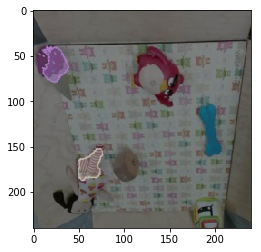

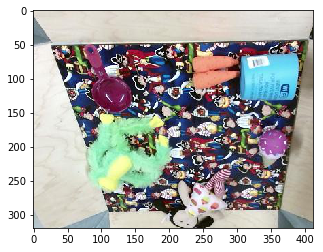

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


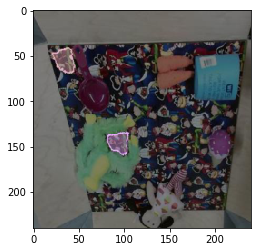

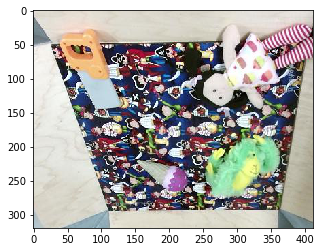

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


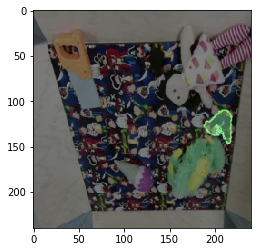

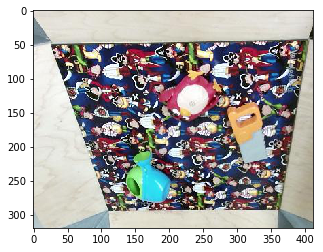

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


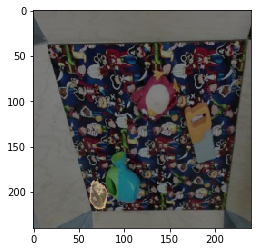

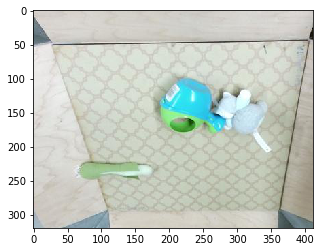

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


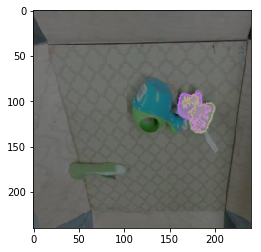

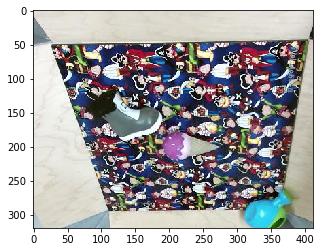

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


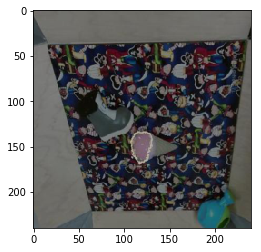

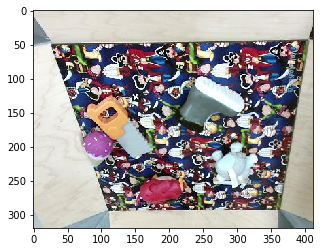

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


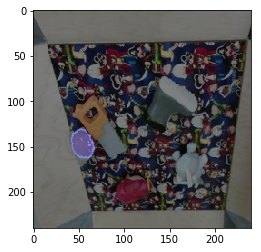

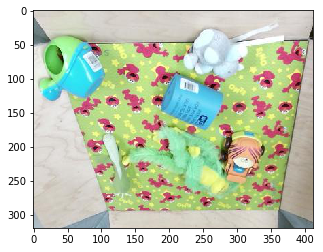

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


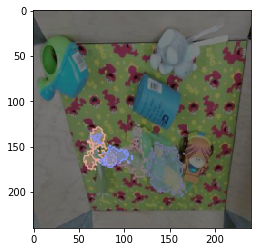

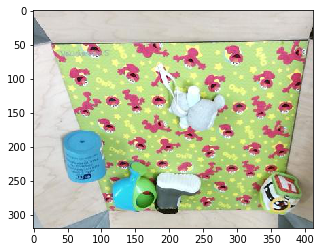

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


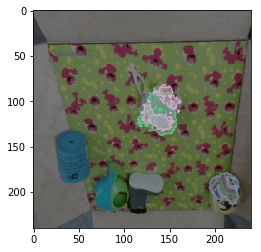

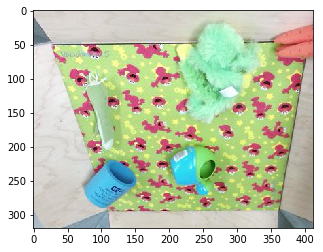

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


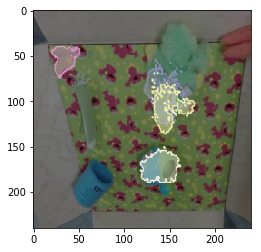

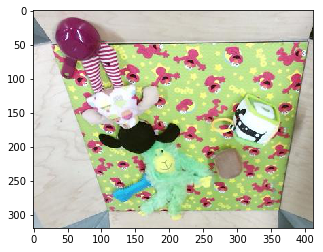

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


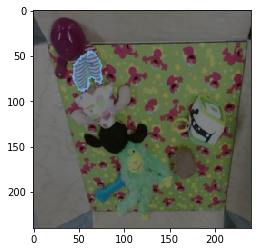

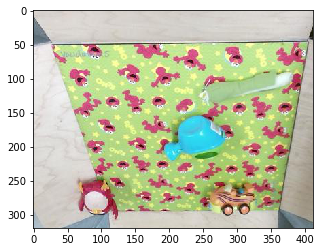

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


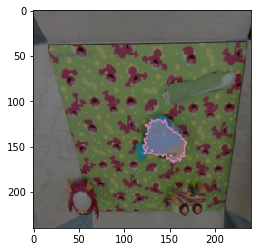

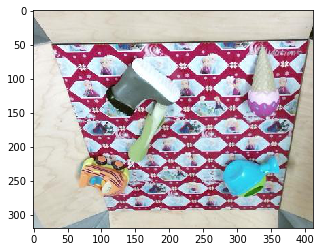

scale 0.7071067811865476
scale 0.8408964152537145
scale 1.0
scale 1.189207115002721
scale 1.4142135623730951
scale 1.681792830507429
scale 2.0


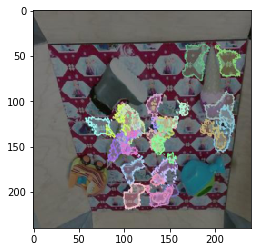

NameError: name 'fred' is not defined

In [8]:

count = 0
for i, img, mask, dp_msk_im, dp_msk_msk in zip(range(len(imgs)), imgs, masks,deep_mask_imgs, deep_mask_masks):
    img = img[:320, :412,:]
    plt.imshow(img)
    plt.show()
    reference.compute_multiscale_masks(img)
    score_cut_NMS = reference.msk_cut_score_NMS(score_tr = 0.85)
    
    coco_result = coco_API_plot(img, score_cut_NMS)
    plt.imshow(coco_result)
    plt.show()
    
    full_size_msks, scores = reference.top_n_masks(120)
    
#     for m, c in zip(full_size_msks[:20], scores[:20]):
#         plt.title(c)
#         tmp = (img.copy()/2).astype(np.uint8)
#         tmp[(m>0).astype(np.bool),0] = 255
#         plt.imshow(tmp)
#         plt.show()
    count += 1
    if count == 20:
        fred()
#     f, axes = plot.subplots(1,4)
#     axes = axes.flatten()
#     axes[0].set_title("original_img")
    

In [ ]:
reference.destory_graph()